<a href="https://colab.research.google.com/github/hwangchanny97/Numpy_Pandas/blob/main/mask_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# tensorflow 2+
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

#plt.style.use('dark_background')

In [32]:
facenet = cv2.dnn.readNet('/content/mask-detection-master/models/deploy.prototxt', '/content/mask-detection-master/models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('/content/mask-detection-master/models/mask_detector.model')

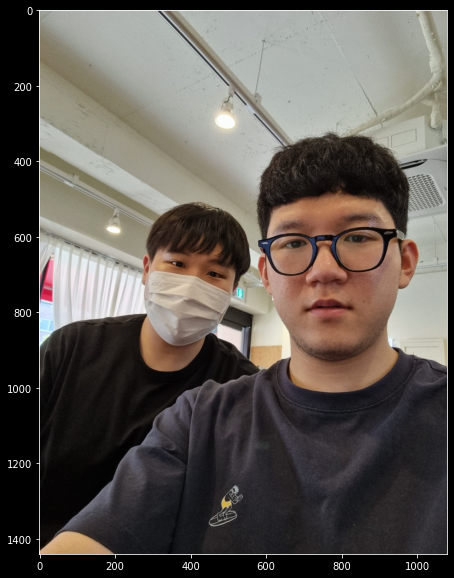

In [33]:
img = cv2.imread('/content/mask-detection-master/imgs/mask_test.jpg')
h, w = img.shape[:2]
plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

In [34]:
blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()

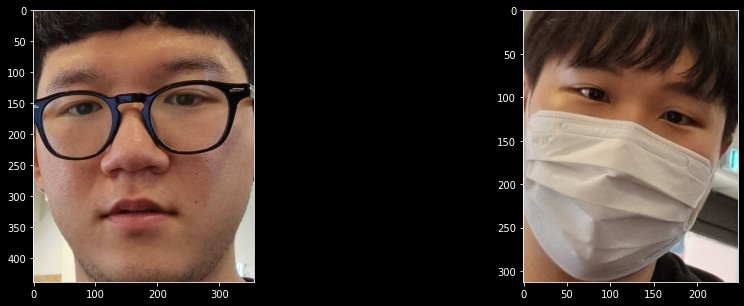

In [35]:
faces = []

for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence < 0.5:
        continue

    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
    
    face = img[y1:y2, x1:x2]
    faces.append(face)

plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])

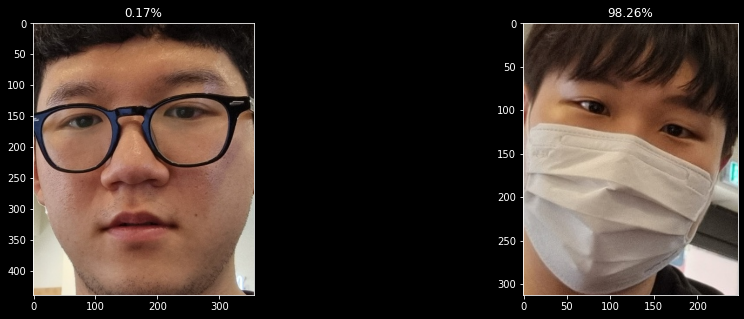

In [36]:
plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    face_input = cv2.resize(face, dsize=(224, 224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)
    
    mask, nomask = model.predict(face_input).squeeze()

    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])
    plt.title('%.2f%%' % (mask * 100))